In [1]:
!wget https://picsum.photos/200/300?grayscale -O img1.png -q

In [3]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter
%matplotlib inline

Q1

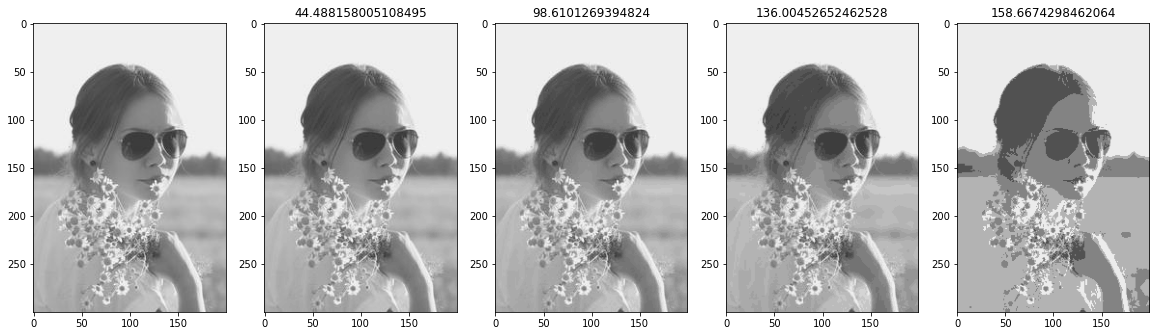

In [ ]:
original = cv2.imread('img1.png', 1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
n_colors = [64, 32, 16, 4]

fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(original)
axs[0].set_title(original)

cnt = 1
for level in n_colors:
  arr = original.reshape((-1, 3))
  kmeans = KMeans(n_clusters=level, random_state=42).fit(arr)
  labels = kmeans.labels_
  centers = kmeans.cluster_centers_
  less_colors = centers[labels].reshape(original.shape).astype('uint8')
  axs[cnt].imshow(less_colors)
  d = (original-less_colors).astype(float)
  mse = np.sqrt(np.einsum('...i,...i->...',d,d))
  axs[cnt].set_title("MSE: ",  str(np.mean(mse)))
  cnt+=1

fig.show()

Q2

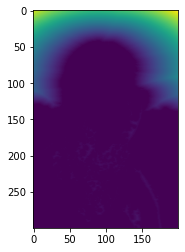

Average Euclidean distance is:  12.916029673187262


In [ ]:
import cv2
from skimage import color
img = cv2.imread('img1.png',0)
ret,thresh= cv2.threshold(img,200,255,cv2.THRESH_BINARY)
from scipy import ndimage
euc= ndimage.distance_transform_edt(thresh,sampling=[2,1])
euc = color.rgb2gray(euc)
plt.imshow(euc)
plt.show()
print('Average Euclidean distance is: ',np.average(euc))

In [ ]:
img = cv2.imread('img1.png',0)
from scipy.spatial import distance
d = []
for rowInd in range(len(img)-1):
  d.append(distance.cityblock(img[rowInd], img[rowInd+1]))

print('Average Cityblock distance is: ',np.average(d))

Average Cityblock distance is:  15124.08026755853


In [ ]:
import cv2
from skimage import color
img = cv2.imread('img1.png',0)
ret,thresh= cv2.threshold(img,200,255,cv2.THRESH_BINARY)
from scipy import ndimage
chb= ndimage.distance_transform_edt(thresh,sampling=[1,1])

print('Average Chessboard distance is: ',np.average(chb))

Average Chessboard distance is:  9.224307041268254


Q3

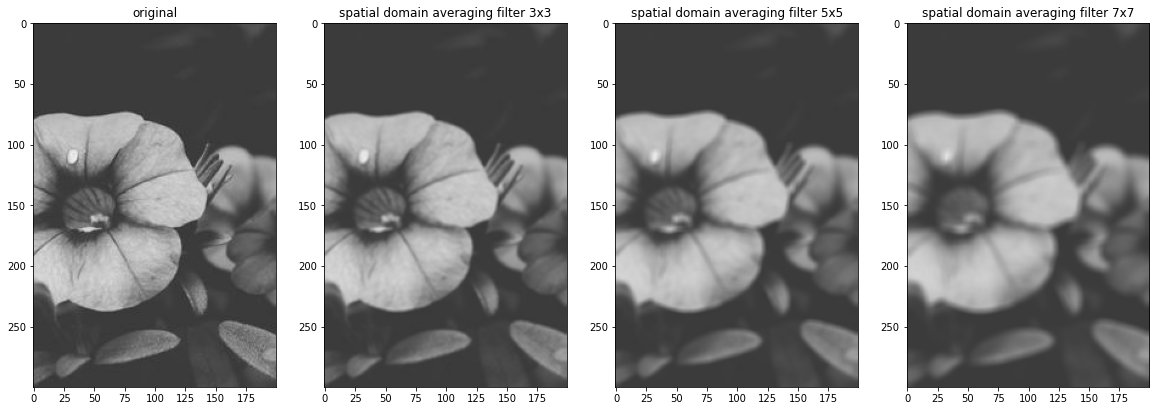

In [8]:
image = cv2.imread('img1.png', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

blur3 = cv2.blur(image,(3, 3))
blur5 = cv2.blur(image,(5, 5))
blur7 = cv2.blur(image,(7, 7))

fig, axs = plt.subplots(1, 4, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('original')

axs[1].imshow(blur3)
axs[1].set_title('spatial domain averaging filter 3x3')

axs[2].imshow(blur5)
axs[2].set_title('spatial domain averaging filter 5x5')

axs[3].imshow(blur7)
axs[3].set_title('spatial domain averaging filter 7x7')

plt.show()